In [29]:
import numpy as np
import matplotlib.pyplot as plt

# The Perceptron

In [14]:
# Broadcasting example
# Given a matrix with shape (m,n) and a vector of shape (1,n), we can add the vector to the matrix (since the outer dim n is the same).
# Numpy will broadcast the vector to the shape (m,n). It'll copy the same row m times and complete the operation (e.g. addition).

X = np.array([
  [1,2],
  [3,4],
  [5,6],
  [7,8]
])

W = np.array([
  [10,10],
  [20,20],
  [30, 30]
])

b = np.array([
  [1,1,1],
])

X @ W.T + b

array([[ 31,  61,  91],
       [ 71, 141, 211],
       [111, 221, 331],
       [151, 301, 451]])

In [60]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Using two features and a single label from the Iris dataset 
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values 
y = iris.target



Text(0, 0.5, 'Petal width (cm)')

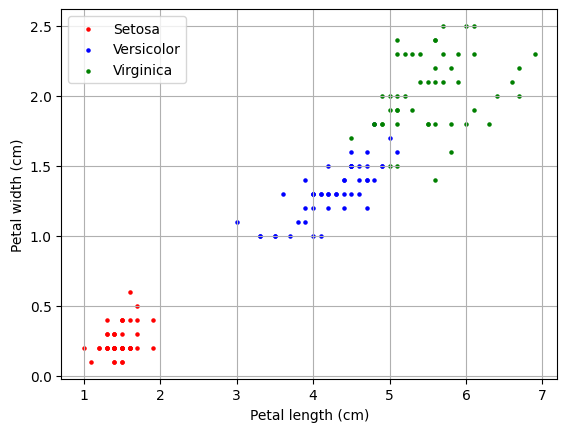

In [61]:
# Notice that Iris Setosa can be linearly separated from the rest of the data (if we were to learn a binary classification
# of what's Setosa and what's not). The other Iris types are not linearly separable.

X_setosa = X[y == 0]
X_versicolor = X[y == 1]
X_virginica = X[y == 2]

plt.scatter(X_setosa[:,0], X_setosa[:,1], s=5, color="red", label="Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], s=5, color="blue", label="Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], s=5, color="green", label="Virginica")

plt.grid()
plt.legend()
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")

In [62]:
# Creating a binary classification problem (Setosa / not Setosa)
y = (iris.target == 0) # Iris setosa

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

per_clf = Perceptron(random_state=42)
per_clf.fit(X_train, y_train)

# Perfect separation because it's linearly separable (try to learn one of the other types and it won't be perfect)
per_clf.score(X_test, y_test)

1.0

### Using multi layer perceptron to solve XOR

In [74]:
# XOR is linearly inseparable. If we use multiple layers of perceptrons (2 layers), we can separate it.
# The weights below have already been fitted, we're just using them to predict.

# XOR dataset (X and y are the XOR logic table)
X = np.array([
  [0,0],
  [0,1],
  [1,0],
  [1,1]
])
y = np.array([0,1,1,0])

b1 = np.array([-3/2, -1/2])
b2 = -1/2

W1 = np.ones((2,2))
W2 = np.array([-1,1])

def predict_xor(x1, x2):
  # layer 1
  X = np.array([x1, x2])
  z1 = X @ W1.T + b1
  hz1 = np.where(z1 >= 0, 1, -1)

  # layer 2
  z2 = hz1 @ W2.T + b2
  hz2 = np.where(z2 >= 0, 1, -1)
  
  return hz2 == 1

print (predict_xor(1,0))

True
